<a href="https://colab.research.google.com/github/kaustubh-sadekar/Colab-Notebooks/blob/master/JetsonNano/CIFAR10_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a neural network using pytorch

Rewriting the following [pytorch blog](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

This model is trained on CIFAR10 dataset


In [0]:
# Importing the libraries
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=8,shuffle=True,num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=False,num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


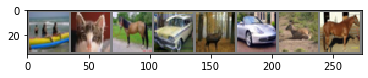

 ship   cat horse   car


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
# Defining the neural network
import torch.nn as nn
import torch.nn.functional as F

class Net1(nn.Module):
    def __init__(self):
        super(Net1,self).__init__()

        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.maxPool = nn.MaxPool2d(2,stride=2)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        self.relu = nn.ReLU()

    def forward(self,x):

        x = self.maxPool(self.relu(self.conv1(x)))
        x = self.maxPool(self.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x
        
net = Net1()

In [0]:
!git clone https://github.com/kaustubh-sadekar/dlutils.git

Cloning into 'dlutils'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [0]:
!sudo python3 dlutils/setup.py install

running install
running bdist_egg
running egg_info
writing kdlutils.egg-info/PKG-INFO
writing dependency_links to kdlutils.egg-info/dependency_links.txt
writing top-level names to kdlutils.egg-info/top_level.txt
reading manifest file 'kdlutils.egg-info/SOURCES.txt'
writing manifest file 'kdlutils.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/dlutils
creating build/bdist.linux-x86_64/egg/dlutils/kdlutils
copying build/lib/dlutils/kdlutils/__init__.py -> build/bdist.linux-x86_64/egg/dlutils/kdlutils
copying build/lib/dlutils/kdlutils/kdlutils.py -> build/bdist.linux-x86_64/egg/dlutils/kdlutils
byte-compiling build/bdist.linux-x86_64/egg/dlutils/kdlutils/__init__.py to __init__.cpython-36.pyc
byte-compiling build/bdist.linux-x86_64/egg/dlutils/kdlutils/kdlutils.py to kdlutils.cpython-36.pyc
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying k

ModuleNotFoundError: ignored

In [0]:
import sys
sys.path.append("dlutils/")
import kdlutils
input_dim = (3,32,32)
layersList = [{'conv':(3,5,3,1,1,1)},{'mp':(2,2,0,1)},
              {'conv':(5,10,3,1,1,1)},{'mp':(2,2,0,1)},
              {'conv':(10,20,3,1,1,1)},{'mp':(2,2,0,1)}]
out = kdlutils.kdlutils.getOutShape(input_dim,layersList)
print(out)

(4, 4, 20)


In [0]:
# Trying out a new network
import torch.nn as nn
import torch.nn.functional as F

class Net2(nn.Module):

    def __init__(self):
        super(Net2,self).__init__()

        self.conv1 = nn.Conv2d(3,5,3)
        self.conv2 = nn.Conv2d(5,10,3)
        self.conv3 = nn.Conv2d(10,20,3)
        self.mp = nn.MaxPool2d(2,stride=2)
        self.linear1 = nn.Linear(2*2*20,200)
        self.linear2 = nn.Linear(200,100)
        self.linear3 = nn.Linear(100,10)
        self.relu = nn.ReLU()
    
    def forward(self,x):

        x = self.mp(self.relu(self.conv1(x)))
        x = self.mp(self.relu(self.conv2(x)))
        x = self.mp(self.relu(self.conv3(x)))
        x = x.view(-1,2*2*20)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)

        return x

net = Net2()

In [0]:
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.01,momentum=0.9)


In [0]:
import time
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
net = net.to(device)
start = time.time()
for epoch in range(10):
    running_loss = 0.0
    val_loss = []
    train_loss = []

    for i,data in enumerate(trainloader,0):
        inputs, labels  = data[0].to(device),data[1].to(device)

        optimizer.zero_grad()

        output = net(inputs)
        loss = criterion(output,labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_loss.append(loss.item())

        if i%200 == 0:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0

    for i,data in enumerate(testloader,0):
        inputs, labels  = data[0].to(device),data[1].to(device)

        optimizer.zero_grad()

        output = net(inputs)
        loss = criterion(output,labels)

        # loss.backward()
        # optimizer.step()

        val_loss.append(loss.item())

print("Time taken : ",(time.time() - start))        
print("Finished training")

# Batch size = 16
# CPU : Time taken :  43.88722324371338
# GPU : Time taken :  31.336997509002686

# Batch size = 32
# CPU : Time taken :  34.24433398246765 
# GPU : Time taken :  20.773815155029297

# Batch size = 64
# CPU : Time taken :  27.367809772491455
# GPU : Time taken :  16.80271053314209

# Batch size = 128
# CPU : Time taken :  25.294211864471436
# GPU : Time taken :  14.73074722290039

cuda:0
[1,     1] loss: 0.011
[1,   201] loss: 2.306
[1,   401] loss: 2.259
[1,   601] loss: 2.086
[1,   801] loss: 2.008
[1,  1001] loss: 1.929
[1,  1201] loss: 1.905
[1,  1401] loss: 1.821
[1,  1601] loss: 1.828
[1,  1801] loss: 1.794
[1,  2001] loss: 1.759
[1,  2201] loss: 1.741
[1,  2401] loss: 1.733
[1,  2601] loss: 1.723
[1,  2801] loss: 1.703
[1,  3001] loss: 1.726
[1,  3201] loss: 1.711
[1,  3401] loss: 1.722
[1,  3601] loss: 1.700
[1,  3801] loss: 1.670
[1,  4001] loss: 1.687
[1,  4201] loss: 1.668
[1,  4401] loss: 1.662
[1,  4601] loss: 1.657
[1,  4801] loss: 1.621
[1,  5001] loss: 1.650
[1,  5201] loss: 1.648
[1,  5401] loss: 1.650
[1,  5601] loss: 1.642
[1,  5801] loss: 1.598
[1,  6001] loss: 1.602
[1,  6201] loss: 1.656
[2,     1] loss: 0.006
[2,   201] loss: 1.621
[2,   401] loss: 1.643
[2,   601] loss: 1.603
[2,   801] loss: 1.598
[2,  1001] loss: 1.607
[2,  1201] loss: 1.589
[2,  1401] loss: 1.631
[2,  1601] loss: 1.628
[2,  1801] loss: 1.645
[2,  2001] loss: 1.618
[2, 

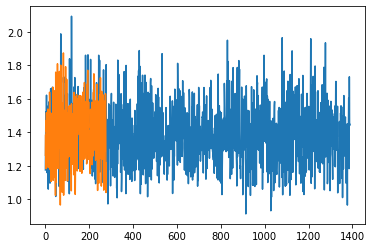

In [0]:
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

In [0]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

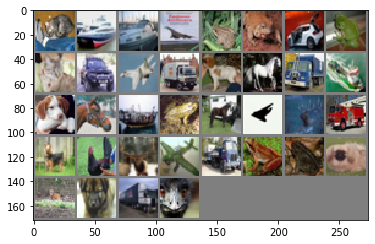

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(16)))

In [0]:
net = Net2()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [0]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(16)))

Predicted:    cat  ship  ship plane  deer  frog   car  frog   cat   car plane truck  deer horse truck  ship


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 38 %
